In [20]:
import yaml
import numpy as np
import torch
from torchvision import transforms
from dataset import HS_FADGaussianDataset
import matplotlib.pyplot as plt
config_path = 'config_hsfad_kldv.yaml'

In [21]:
with open(config_path, 'r') as f:
    cfg = yaml.safe_load(f)

In [22]:
train_transform = transforms.Compose([
    transforms.Resize((cfg['dataset']['image_size'], cfg['dataset']['image_size'])),
    transforms.RandomResizedCrop(cfg['dataset']['image_size'], scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                            std=[0.229, 0.224, 0.225]),
])

train_dataset = HS_FADGaussianDataset(
    root_dir=cfg['dataset']['root_dir'],
    transform=train_transform,
    split='train',
    val_split=cfg['dataset']['val_split'],
)

INFO:dataset:Age weights: {10: 17.126614987080103, 20: 2.311018131101813, 30: 1.0, 40: 3.3868165559529895, 50: 5.110254433307633}


In [23]:
def generate_age_distribution(age):
    """
    주어진 나이를 기반으로 Gaussian 분포를 생성합니다.

    Args:
        age (int): 실제 나이 라벨

    Returns:
        torch.Tensor: Gaussian 분포 형태의 라벨 벡터
    """
    age_classes = [10, 20, 30, 40, 50]
    sigma = 5
    distribution = np.exp(-0.5 * ((np.array(age_classes) - age) / sigma) ** 2)
    distribution /= distribution.sum()  # 정규화
    return torch.tensor(distribution, dtype=torch.float32)

In [24]:
age_distribution = generate_age_distribution(40)

In [25]:
age_distribution

tensor([1.1983e-08, 2.6393e-04, 1.0648e-01, 7.8678e-01, 1.0648e-01])

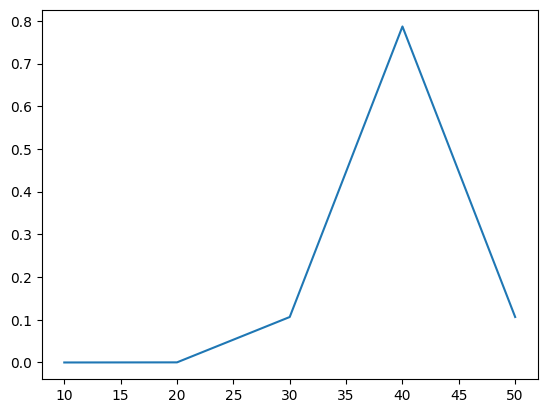

In [28]:
plt.plot([10, 20, 30, 40, 50], age_distribution)
plt.show()